In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('../data/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
data["Sales"].min()

np.float64(1.6)

In [4]:
data["Sales"].max()

np.float64(27.0)

# Correlacion de variables

In [5]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [6]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

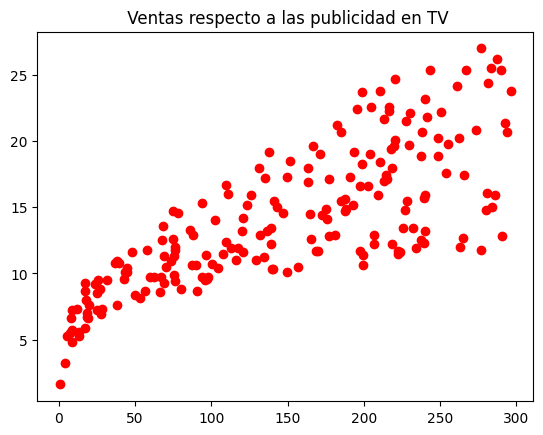

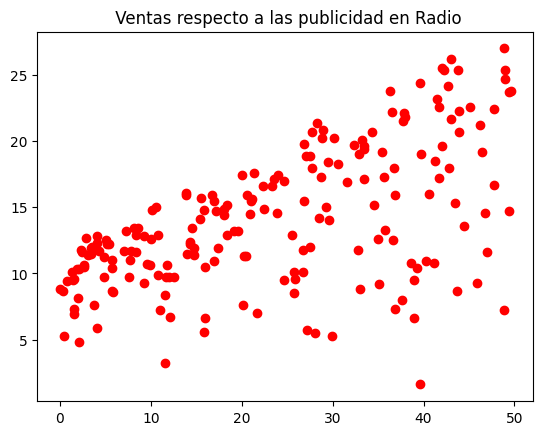

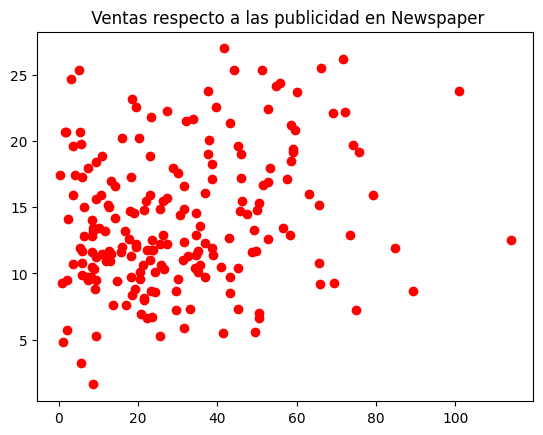

In [7]:
cols= ['TV', 'Radio', 'Newspaper']

for col in cols:
    plt.plot(data[col],data['Sales'], "ro")
    plt.title(" Ventas respecto a las publicidad en %s"%col)
    plt.show()

# Creacion de los modelos de regresion simple 

# TV

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
data_tv = data["TV"]
data_tv= data_tv.values.reshape(-1, 1)

In [10]:
y = data["Sales"].values

In [11]:
#entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(data_tv, y, test_size=0.2, random_state=42)

In [12]:
reg= LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
y_pred = reg.predict(X_test)
print("Predicciones:{}, Valores Actuales:{}".format(y_pred[:4], y_test[:4]))

Predicciones:[14.71794394 16.2115484  20.74819743  7.66403631], Valores Actuales:[16.9 22.4 21.4  7.3]


In [17]:
r_squared = reg.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(r_squared, rmse)

0.6766954295627076 3.194472431998898


In [19]:
sales_comp=pd.DataFrame({
    "TV": X_test.flatten(),
    "realSales": y_test.flatten(),
    "predictedSales": y_pred.flatten()
})

sales_comp.head()

,TV,realSales,predictedSales
0,163.3,16.9,14.717944
1,195.4,22.4,16.211548
2,292.9,21.4,20.748197
3,11.7,7.3,7.664036
4,220.3,24.7,17.370139


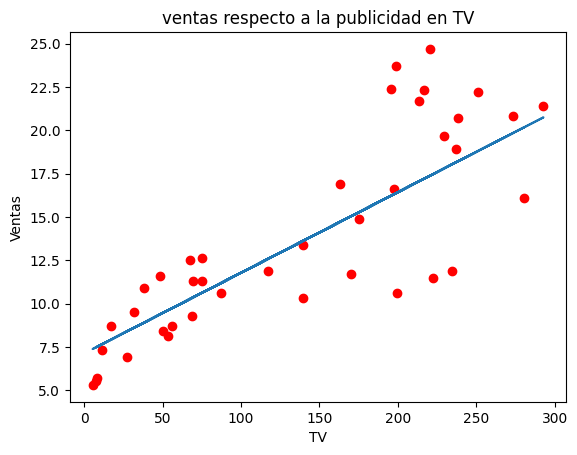

In [21]:
#graficamos nuestro modelo junto a los datos de nuestro conjunto de testing
plt.plot(sales_comp["TV"], sales_comp["realSales"], "ro")
plt.plot(sales_comp["TV"], sales_comp["predictedSales"])
plt.title("ventas respecto a la publicidad en TV")
plt.xlabel("TV")
plt.ylabel("Ventas")
plt.show()

# RADIO

In [25]:
data_tv = data["Radio"]
data_tv = data_tv.values.reshape(-1, 1)
y = data["Sales"].values
X_train, X_test, y_train, y_test = train_test_split(data_tv, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Predicciones:{}, Valores Actuales:{}".format(y_pred[:4], y_test[:4]))

Predicciones:[15.88332197 19.17427219 15.20877938 16.96667826], Valores Actuales:[16.9 22.4 21.4  7.3]


In [26]:
r_squared = reg.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(r_squared, rmse)

0.2634309396999791 4.8216974799471926


In [27]:
sales_comp = pd.DataFrame({
    "Radio": X_test.flatten(),
    "realSales": y_test.flatten(),
    "predictedSales": y_pred.flatten()
})
sales_comp.head()

,Radio,realSales,predictedSales
0,31.6,16.9,15.883322
1,47.7,22.4,19.174272
2,28.3,21.4,15.208779
3,36.9,7.3,16.966678
4,49.0,24.7,19.440001


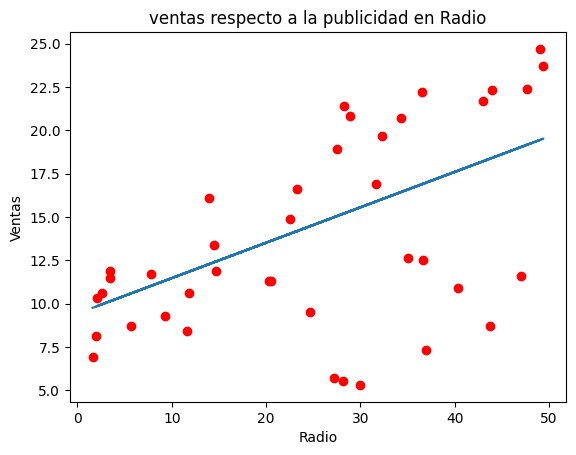

In [28]:
plt.plot(sales_comp["Radio"], sales_comp["realSales"], "ro")
plt.plot(sales_comp["Radio"], sales_comp["predictedSales"])
plt.title("ventas respecto a la publicidad en Radio")
plt.xlabel("Radio")
plt.ylabel("Ventas")
plt.show()

# Periodico